In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score, f1_score

In [2]:
data = pd.read_csv("data.csv", index_col="ID")

In [3]:
pd.set_option('display.max_columns', 120)

In [4]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,tcp,http,SF,295,2584,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,0.0,0.0,0.0,0.0,1.0,0.0,0.67,101,255,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0
1,0,tcp,http,SF,312,839,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,7,0.0,0.0,0.0,0.0,1.0,0.0,0.29,223,255,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0
2,0,tcp,ftp,SF,1225,2451,0,0,0,28,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,116,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1
3,0,tcp,http,SF,293,296,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.50,216,255,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0
4,0,tcp,X11,REJ,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.5,1.0,0.5,1.0,0.00,115,1,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23002 entries, 0 to 23001
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     23002 non-null  int64  
 1   protocol_type                23002 non-null  object 
 2   service                      23002 non-null  object 
 3   flag                         23002 non-null  object 
 4   src_bytes                    23002 non-null  int64  
 5   dst_bytes                    23002 non-null  int64  
 6   land                         23002 non-null  int64  
 7   wrong_fragment               23002 non-null  int64  
 8   urgent                       23002 non-null  int64  
 9   hot                          23002 non-null  int64  
 10  num_failed_logins            23002 non-null  int64  
 11  logged_in                    23002 non-null  int64  
 12  num_compromised              23002 non-null  int64  
 13  root_shell           

In [6]:
num_rows, num_columns = data.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 23002
Number of Columns: 43


In [7]:
# Calculate summary statistics for numeric columns
numeric_columns = data.select_dtypes(include=['number'])  # Select numeric columns
summary_statistics = numeric_columns.describe()

# Print summary statistics
print("\nSummary Statistics for Numeric Columns:")
summary_statistics.T


Summary Statistics for Numeric Columns:


,count,mean,std,min,25%,50%,75%,max
duration,23002.0,307.196896,2.697346e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,23002.0,25889.549561,2.522555e+06,0.0,0.00,44.00,274.75,381709090.0
dst_bytes,23002.0,3588.139423,9.231127e+04,0.0,0.00,0.00,486.00,5151385.0
land,23002.0,0.000087,9.324440e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,23002.0,0.024259,2.627939e-01,0.0,0.00,0.00,0.00,3.0
urgent,23002.0,0.000043,6.593518e-03,0.0,0.00,0.00,0.00,1.0
hot,23002.0,0.199113,2.167079e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,23002.0,0.001174,4.614070e-02,0.0,0.00,0.00,0.00,4.0
logged_in,23002.0,0.386532,4.869653e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,23002.0,0.231241,1.077867e+01,0.0,0.00,0.00,0.00,884.0


# Data Distribution:

In [8]:
"""# Visualize the distribution of numeric variables using histograms
numeric_columns = data.select_dtypes(include=['number'])  # Select numeric columns
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()"""

"# Visualize the distribution of numeric variables using histograms\nnumeric_columns = data.select_dtypes(include=['number'])  # Select numeric columns\nfor column in numeric_columns.columns:\n    plt.figure(figsize=(8, 4))\n    sns.histplot(data[column], kde=True)\n    plt.title(f'Distribution of {column}')\n    plt.xlabel(column)\n    plt.ylabel('Frequency')\n    plt.show()"

In [9]:
# Specify the target variable
target_variable = 'Class'

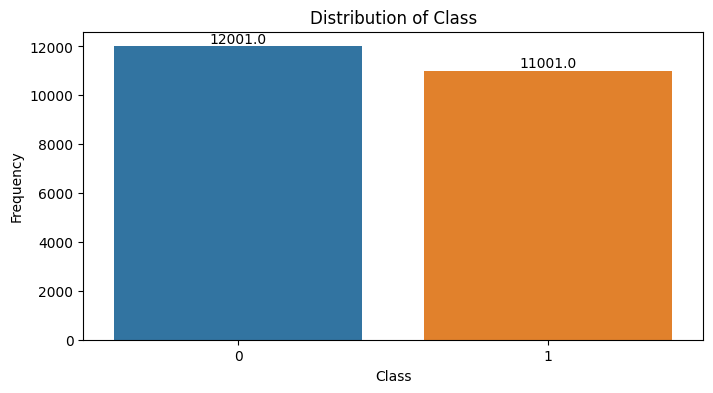

In [10]:
# Create a bar plot to visualize the distribution
plt.figure(figsize=(8, 4))
ax = sns.countplot(data=data, x=target_variable)
plt.title(f'Distribution of {target_variable}')
plt.xlabel(target_variable)
plt.ylabel('Frequency')

# Annotate the bars with their respective counts
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

# Correlation Analysis:

In [11]:
# Select numeric columns for correlation analysis
numeric_columns = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

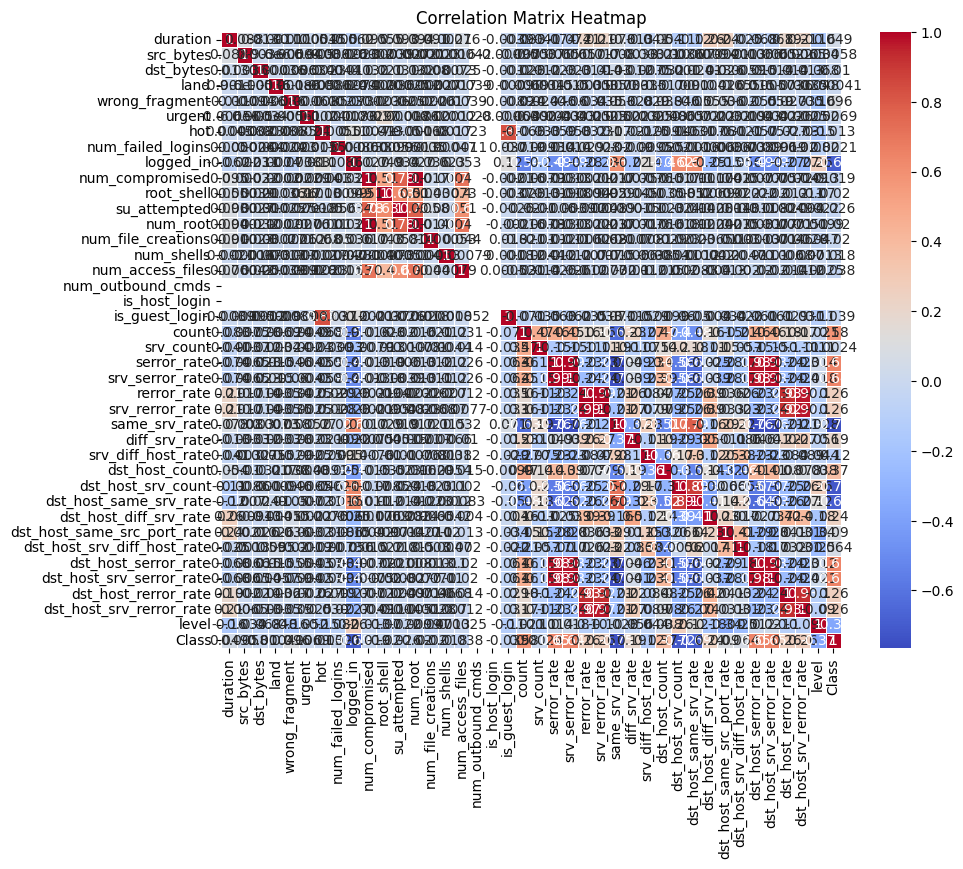

In [12]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# Outlier Detection:

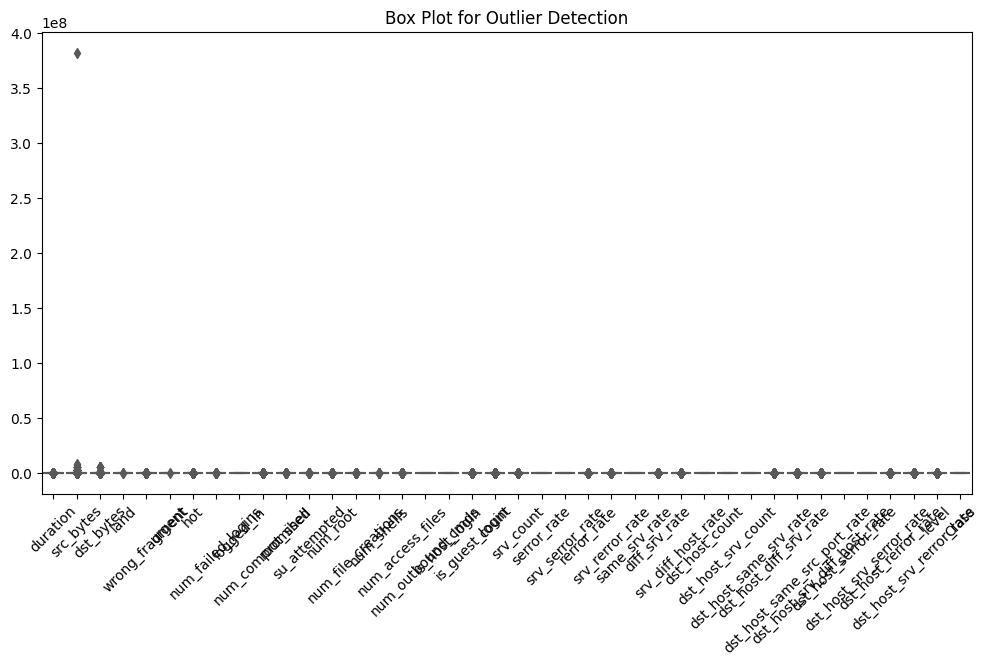

In [13]:
# Select numeric columns for outlier detection
numeric_columns = data.select_dtypes(include=['number'])

# Create box plots for numeric columns to visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=numeric_columns, orient="v", palette="Set2")
plt.title("Box Plot for Outlier Detection")
plt.xticks(rotation=45)
plt.show()

In [14]:
"""# Create scatter plots for pairs of numeric variables (optional)
# This can help identify outliers in relationships between variables
sns.pairplot(data=numeric_columns)
plt.suptitle("Pair Plot for Outlier Detection", y=1.02)
plt.show()"""

'# Create scatter plots for pairs of numeric variables (optional)\n# This can help identify outliers in relationships between variables\nsns.pairplot(data=numeric_columns)\nplt.suptitle("Pair Plot for Outlier Detection", y=1.02)\nplt.show()'

# Feature Exploration:

In [15]:
# Identify and explore categorical features
categorical_features = data.select_dtypes(include=['object', 'category']).columns
print("\nCategorical Features:")
print(categorical_features)
print(categorical_features.size)


Categorical Features:
Index(['protocol_type', 'service', 'flag'], dtype='object')
3


In [16]:
# Print unique categories for each categorical feature
for feature in categorical_features:
    unique_categories = data[feature].unique()
    print(f"\nUnique categories for {feature}:")
    print(unique_categories)


Unique categories for protocol_type:
['tcp' 'udp' 'icmp']

Unique categories for service:
['http' 'ftp' 'X11' 'private' 'http_443' 'other' 'imap4' 'domain_u'
 'telnet' 'name' 'netbios_ns' 'smtp' 'shell' 'eco_i' 'pop_3' 'time' 'bgp'
 'auth' 'klogin' 'uucp_path' 'finger' 'ftp_data' 'urp_i' 'ecr_i' 'exec'
 'nnsp' 'efs' 'vmnet' 'uucp' 'iso_tsap' 'supdup' 'daytime' 'nntp' 'login'
 'netbios_dgm' 'courier' 'sql_net' 'sunrpc' 'ssh' 'gopher' 'ctf' 'whois'
 'netstat' 'ldap' 'netbios_ssn' 'csnet_ns' 'hostnames' 'Z39_50' 'systat'
 'link' 'rje' 'IRC' 'ntp_u' 'discard' 'domain' 'mtp' 'kshell' 'echo'
 'tim_i' 'printer' 'remote_job' 'red_i' 'pop_2' 'pm_dump' 'urh_i'
 'http_8001']

Unique categories for flag:
['SF' 'REJ' 'S0' 'RSTO' 'RSTR' 'S2' 'SH' 'S1' 'OTH' 'RSTOS0' 'S3']


# Data Preprocessing:

In [17]:
# Use One-Hot Encoding for nominal categorical variables 
nominal_categorical_columns = ['protocol_type', 'service', 'flag']
data = pd.get_dummies(data, columns=nominal_categorical_columns, prefix=nominal_categorical_columns)

In [18]:
data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,295,2584,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,0.0,0.0,0.0,0.0,1.0,0.0,0.67,101,255,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
1,0,312,839,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,7,0.0,0.0,0.0,0.0,1.0,0.0,0.29,223,255,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,0,1225,2451,0,0,0,28,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,116,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11,1,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,0,293,296,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.50,216,255,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,Fal

In [19]:
for col in data.columns:
    if data[col].dtype == bool:
        data[col] = data[col].astype(int)

In [20]:
data.shape

(23002, 120)

In [21]:
# Identify columns containing only 0 and 1 values
binary_columns = [col for col in data.columns if set(data[col].unique()) == {0, 1}]

# Filter and display columns that are not binary
non_binary_columns = [col for col in data.columns if col not in binary_columns]
filtered_data = data[non_binary_columns]

# Display the filtered DataFrame
filtered_data.head()

,duration,src_bytes,dst_bytes,wrong_fragment,hot,num_failed_logins,num_compromised,su_attempted,num_root,num_file_creations,num_access_files,num_outbound_cmds,is_host_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,295,2584,0,0,0,0,0,0,0,0,0,0,2,3,0.0,0.0,0.0,0.0,1.0,0.0,0.67,101,255,1.00,0.00,0.01,0.03,0.0,0.0,0.00,0.01,21
1,0,312,839,0,0,0,0,0,0,0,0,0,0,5,7,0.0,0.0,0.0,0.0,1.0,0.0,0.29,223,255,1.00,0.00,0.00,0.02,0.0,0.0,0.01,0.01,21
2,0,1225,2451,0,28,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.0,0.0,0.00,255,116,0.45,0.02,0.00,0.00,0.0,0.0,0.00,0.00,11
3,0,293,296,0,0,0,0,0,0,0,0,0,0,3,4,0.0,0.0,0.0,0.0,1.0,0.0,0.50,216,255,1.00,0.00,0.00,0.02,0.0,0.0,0.00,0.02,21
4,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1,0.0,0.0,0.5,1.0,0.5,1.0,0.00,115,1,0.01,0.03,0.01,0.00,0.0,0.0,0.01,1.00,11


In [22]:
# Scaling Features
# Identify numeric columns
numeric_columns = data[['duration', 'src_bytes', 'dst_bytes', 'wrong_fragment', 'hot', 'num_failed_logins', 'num_compromised', 'su_attempted', 'num_root', 'num_file_creations', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'level']]
# Standardize numeric features to have mean=0 and standard deviation=1
scaler = StandardScaler()
data[numeric_columns.columns] = scaler.fit_transform(data[numeric_columns.columns])

In [23]:
data.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,level,Class,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_hostnames,service_http,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,-0.113891,-0.010146,-0.010878,0,-0.092313,0,-0.091883,-0.02544,1,-0.021454,0,-0.027083,-0.021307,-0.028439,0,-0.042118,0.0,0.0,0,-0.730387,-0.340135,-0.652006,-0.645672,-0.374760,-0.375485,0.787313,-0.353340,2.236091,-0.838012,1.286793,1.087220,-0.444956,-0.445907,-0.015621,-0.653498,-0.638847,-0.388051,-0.345050,0.657324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.113891,-0.010140,-0.029782,0,-0.092313,0,-0.091883,-0.02544,1,-0.021454,0,-0.027083,-0.021307,-0.028439,0,-0.042118,0.0,0.0,0,-0.704393,-0.285074,-0.652006,-0.645672,-0.374760,-0.375485,0.787313,-0.353340,0.757066,0.398260,1.286793,1.087220,-0.444956,-0.478225,-0.105427,-0.653498,-0.638847,-0.355541,-0.345050,0.657324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,-0.113891,-0.009778,-0.012319,0,-0.092313,0,12.829013,-0.02544,1,-0.021454,0,-0.027083,-0.021307,-0.028439,0,-0.042118,0.0,0.0,1,-0.739052,-0.367665,-0.652006,-0.645672,-0.374760,-0.375485,0.787313,-0.353340,-0.371663,0.722528,0.027241,-0.137769,-0.339644,-0.478225,-0.285039,-0.653498,-0.638847,-0.388051,-0.376398,-3.631119,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,-0.113891,-0.010147,-0.035664,0,-0.092313,0,-0.091883,-0.02544,1,-0.021454,0,-0.027083,-0.021307,-0.028439,0,-0.042118,0.0,0.0,0,-0.721722,-0.326369,-0.652006,-0.645672,-0.374760,-0.375485,0.787313,-0.353340,1.574422,0.327326,1.286793,1.087220,-0.444956,-0.478225,-0.105427,-0.653498,-0.638847,-0.388051,-0.313702,0.657324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,-0.113891,-0.010263,-0.038871,0,-0.092313,0,-0.091883,-0.02544,0,-0.021454,0,-0.027083,-0.021307,-0.028439,0,-0.042118,0.0,0.0,0,-0.730387,-0.367665,-0.652006,-0.645672,1.186389,2.711074,-0.344193,5.208548,-0.3

In [24]:
X = data.drop('Class', axis=1)
y = data['Class']

## **Dimensionality Reduction:**

In [25]:
# Create a PCA instance with the desired number of components
n_components = 5  # Adjust the number of components as needed
pca = PCA(n_components=n_components)

In [26]:
# Fit PCA on the scaled feature matrix
X = pca.fit_transform(X)

In [27]:
# Create a DataFrame with the reduced dimensions
X = pd.DataFrame(data=X, columns=[f'PC{i}' for i in range(1, n_components + 1)])

## Split the dataset for train and test

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# logistic regression

In [29]:
# Create a logistic regression model
logistic_model = LogisticRegression()

In [30]:
# Train the model on the training data
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [31]:
# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

In [32]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logistic_model.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.95


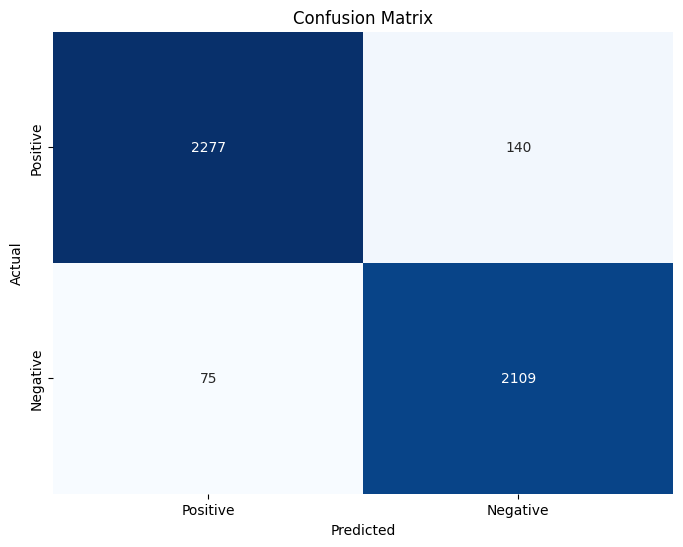

In [33]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

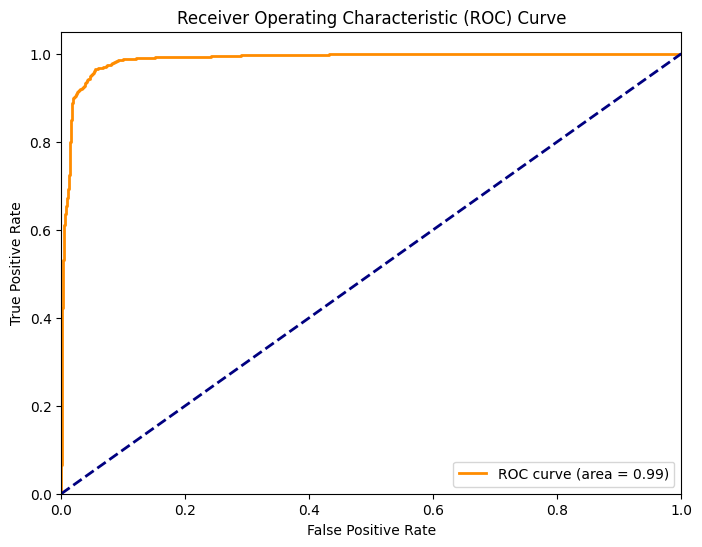

In [34]:
# Predict probabilities for the positive class (class 1)
y_probs = logistic_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

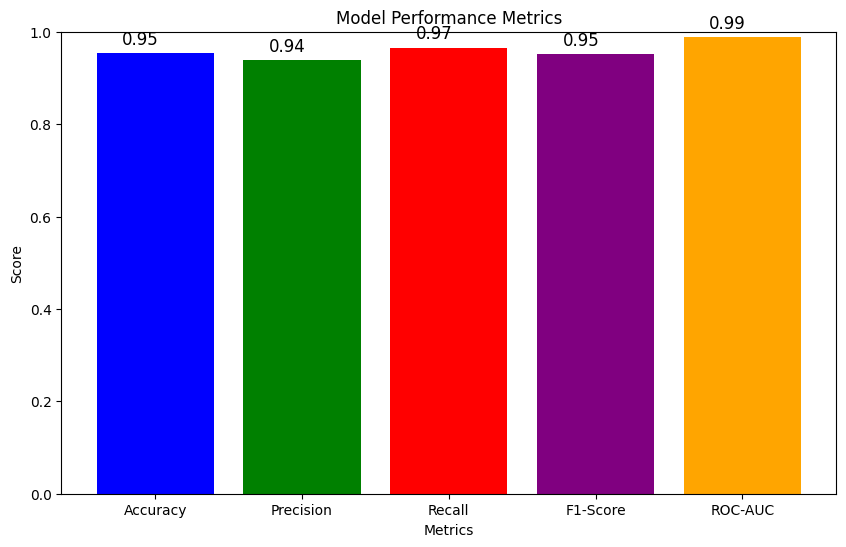

In [35]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_probs)

# Create a list of metric names and a corresponding list of metric values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
values = [accuracy, precision, recall, f1, roc_auc]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metrics')
plt.ylim(0, 1)  # Set the y-axis range to 0-1

# Annotate each bar with its value
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{value:.2f}', ha='center', color='black', fontsize=12)

plt.show()

## DecisionTree

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree classifier with desired parameters
decision_tree = DecisionTreeClassifier(max_depth=None, random_state=42)  # You can adjust max_depth and other hyperparameters

# Fit the classifier to your training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred_dt = decision_tree.predict(X_test)

# Evaluate the model's accuracy on the test set
accuracy = decision_tree.score(X_test, y_test)
print('Accuracy of Decision Tree classifier on test set: {:.2f}'.format(accuracy))

Accuracy of Decision Tree classifier on test set: 0.99


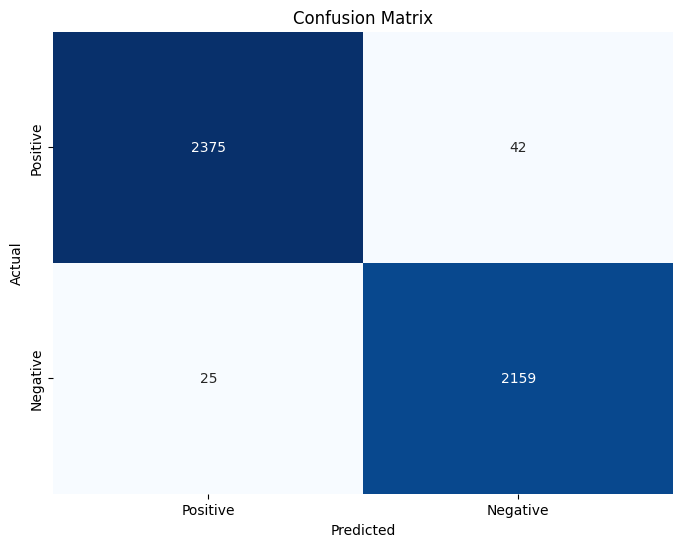

In [37]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dt)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

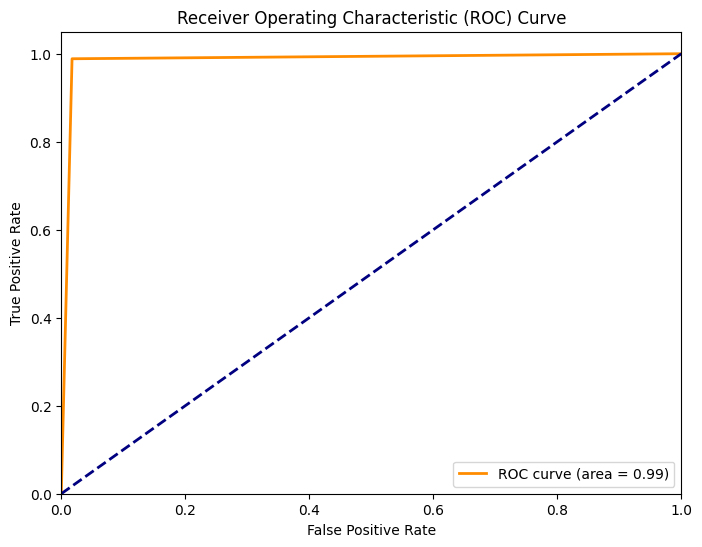

In [38]:
# Predict probabilities for the positive class (class 1)
y_probs = decision_tree.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

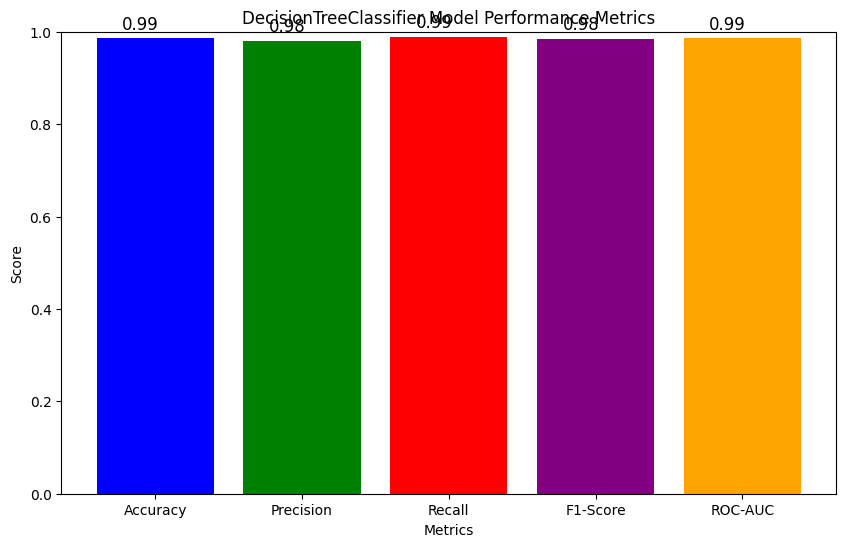

In [39]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_probs)

# Create a list of metric names and a corresponding list of metric values
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
values = [accuracy, precision, recall, f1, roc_auc]

plt.figure(figsize=(10, 6))
bars = plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('DecisionTreeClassifier Model Performance Metrics')
plt.ylim(0, 1)  # Set the y-axis range to 0-1

# Annotate each bar with its value
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{value:.2f}', ha='center', color='black', fontsize=12)

plt.show()